# Letnie igrzyska olimpijskie II

## Wprowadzenie

Wykorzystujemy moduł Pandas do analizy dokumentu z dokonaniami medalowymi na letnich igrzyskach olimpijskich w latach 1976-2008. Plik z tabelą csv znajduje się na stronie 
[kaggle](https://www.kaggle.com/divyansh22/summer-olympics-medals)

Przedstawimy kilka kolejnych analiz, ale tym razem postawimy nacisk na interpretację graficzną.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Funkcja `seaborn.set()` modyfikuje środowisko notatnika wpływając na wygląd rysunków. Z [dokumentacji](https://seaborn.pydata.org/generated/seaborn.set.html):
> Set aesthetic parameters in one step.

Jeśli nie masz modułu Seaborn, to możesz łatwo go doinstalować. Możesz również nie wywoływać tej funkcji, jej działanie ma wpływ jedynie na estetykę wykresów.

In [2]:
import seaborn as sns
sns.set()

Przygotowanie dokumentu jak w poprzednim arkuszu:

In [3]:
"""
olimp = pd.read_csv('Summer-Olympic-medals-1976-to-2008.csv', encoding='cp1252')
olimp.dropna(inplace=True)
olimp.Year = olimp.Year.astype('int')
typy = olimp.dtypes == 'object'
olimp.loc[:, typy] = olimp.loc[:, typy].astype('string')
olimp.dtypes
"""

"\nolimp = pd.read_csv('Summer-Olympic-medals-1976-to-2008.csv', encoding='cp1252')\nolimp.dropna(inplace=True)\nolimp.Year = olimp.Year.astype('int')\ntypy = olimp.dtypes == 'object'\nolimp.loc[:, typy] = olimp.loc[:, typy].astype('string')\nolimp.dtypes\n"

Lub wczytanie przygotowanego dokumentu z formatu *pickle*:

In [4]:
olimp = pd.read_pickle('summer_1976_2008.pkl')

Początek:

In [5]:
olimp.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


## Jak zmieniała się liczba medalistów przez lata?

To zadanie mamy już w jakimś stopniu wykonane, teraz jednak zilustrujemy wyniki wykresami.

Ramka `sportowcy` zawiera liczbę medalistów podczas każdej edycji z podziałem na płeć:

In [61]:
sportowcy = olimp.groupby('Year Gender'.split()).size().unstack()
#olimp.groupby(['Year', 'Gender']).size().unstack()
sportowcy

Gender,Men,Women
Year,,
1976,924,381
1980,958,429
1984,973,486
1988,1011,535
1992,1105,600
1996,1082,777
2000,1126,889
2004,1099,899
2008,1110,932


Metoda `.plot()` wywołana bez żadnych parametrów tworzy ciągły wykres dla wszystkich kolumn z danymi liczbowymi. Widzimy nie tylko rysunek, ale i rezultat zwracany przez wywołanie
```
<matplotlib.axes._subplots.AxesSubplot at 0x7efe8593fd68>
```
To pokazuje, że metoda działa nie tylko przez efekty uboczne (wyświetlanie rysunku), zwraca również wartość. Jeśli nie chcesz widzieć zwracanej wartości zakończ ostatni wiersz w komórce średnikiem.

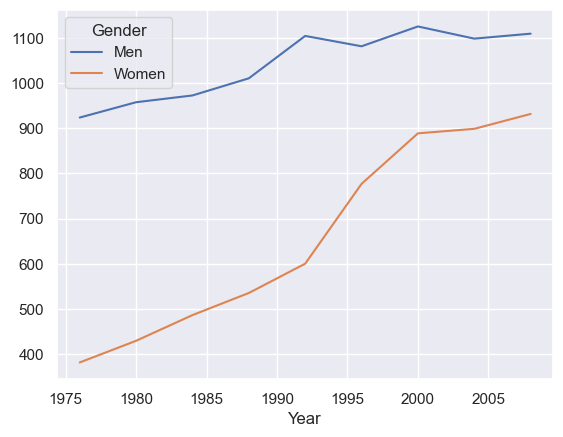

In [7]:
sportowcy.plot();

__*Ćwiczenie:*__ *Dodaj do ramki `sportowcy` dwie kolumny: z danymi tekstowymi i z danymi liczbowymi. Jak to wpłynie na domyślne wywołanie metody `.plot()`?*

Zauważ, że automatycznie została dodana legenda wykorzystująca nazwy kolumn oraz indeks i nazwa indeksu. Czy z punktu widzenia dokumentu indeks możemy uznać za poprawny?

Wywołanie samodzielnie definiuje podziałkę na obu osiach mając na względzie czytelność z jednej strony i wierność danym z drugiej. Oczekiwania te są wzajemnie sprzeczne, gdzieś po drodze musi zostać przyjęty kompromis. Widać, że na naszym rysunku punkty podziałki zostały przesunięte do wartości możliwie "okrągłych". Daje to całkiem czytelny efekt na osi pionowej i kompletnie mylący na poziomej -- **olimpiady odbywają się co cztery a nie co pięć lat**, do tego w żadnym roku przedstawionym na osi olimpiady nie było.

Odpowiednią podziałkę możemy wprowadzić parametrami `xticks`, `yticks`:

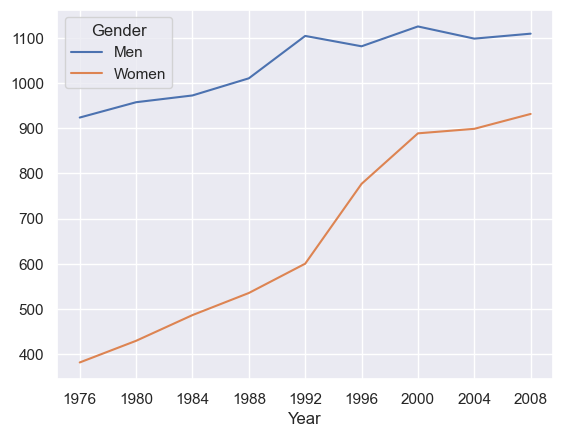

In [8]:
sportowcy.plot(xticks=sportowcy.index);

Położenie konkretnych obserwacji możemy zaznaczyć wykorzystując parametr `marker`. Gdy zajrzysz do [dokumentacji](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot) metody `.plot()`, to nie znajdziesz tam opisu tego parametru. Powodem tego jest to, że jest to parametr funkcji `plot()` z modułu `mattplotlib.pyplot` i w linkowanej dokumentacji mieści się w zbiorczym `**kwargs`. W istocie metoda `.plot()` jest nakładką na `plot()` z modułu `matplotlib.pyplot`, parametry tej funkcji mogą być ustawiane w metodzie i z niej zostaną przekazane do funkcji. Spis różnych markerów znajdziesz [tutaj](https://matplotlib.org/3.1.1/api/markers_api.html).

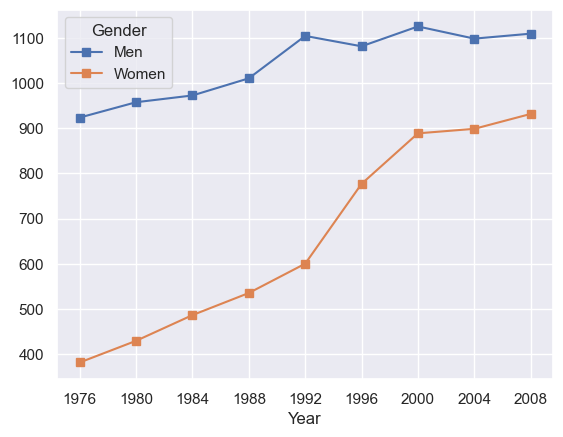

In [9]:
sportowcy.plot(xticks=sportowcy.index,
               marker='s');

Tytułujemy rysunek i modyfikujemy rozmiar:

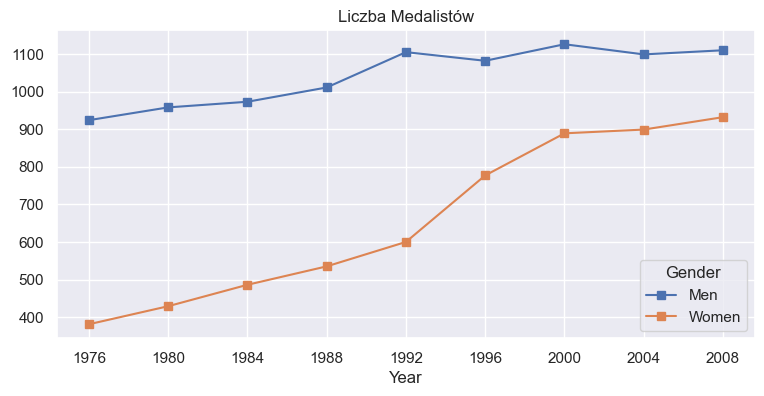

In [14]:
sportowcy.plot(xticks=sportowcy.index,
               marker='s',
               title='Liczba Medalistów',
               figsize=(9, 4));

Często wykorzystywanym parametrem metody `.plot()` jest `kind`. Wskazuje on na rodzaj tworzonego wykresu. Domyślnie dostajemy kolejne punkty połączone odcinkami (mogą wystąpić przerwy, jeśli w wartościach znajdują się braki). [Tutaj](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot) znajdziesz dokumentację metody i w szczególności możliwe rodzaje wykresów.

Dodajemy do rysunku powyżej kolorowanie obszaru pod wykresem, czyli `kind='area'`. Ponieważ mamy dwa atrybuty, więc wynikiem jest **kumulacja wykresów**. Dla lepszej czytelności dodajemy przezroczystość `alpha` (zakres od 0 do 1), jesteśmy jednak zmuszeni do rezygnacji z parametru `marker`:

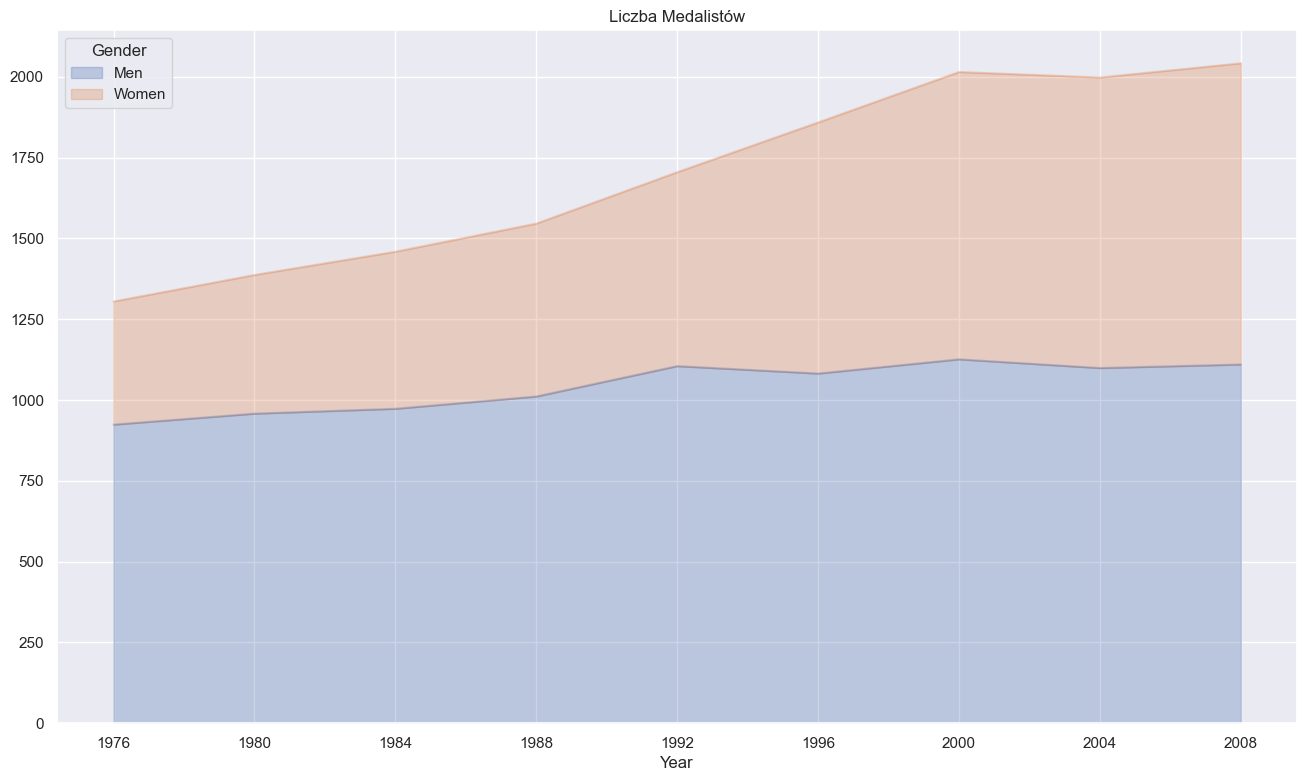

In [16]:
sportowcy.plot(kind='area',
               alpha=0.3,
               xticks=sportowcy.index,
               title='Liczba Medalistów',
               figsize=(16, 9));

Na koniec tej sekcji popatrzmy, jak wśród medalistów przez wszystkie edycje kształtował się udział procentowy kobiet:

In [17]:
sportowcy['Women (%)'] = sportowcy.Women / (sportowcy.Women + sportowcy.Men) * 100
sportowcy

Gender,Men,Women,Women (%)
Year,,,
1976,924,381,29.195402
1980,958,429,30.930065
1984,973,486,33.310487
1988,1011,535,34.605433
1992,1105,600,35.190616
1996,1082,777,41.796665
2000,1126,889,44.119107
2004,1099,899,44.994995
2008,1110,932,45.641528


Konkretną kolumnę do wyświetlenia przekazujemy parametrem `y`. W ten sposób możemy przekazać również zestaw kolumn w liście nazw:

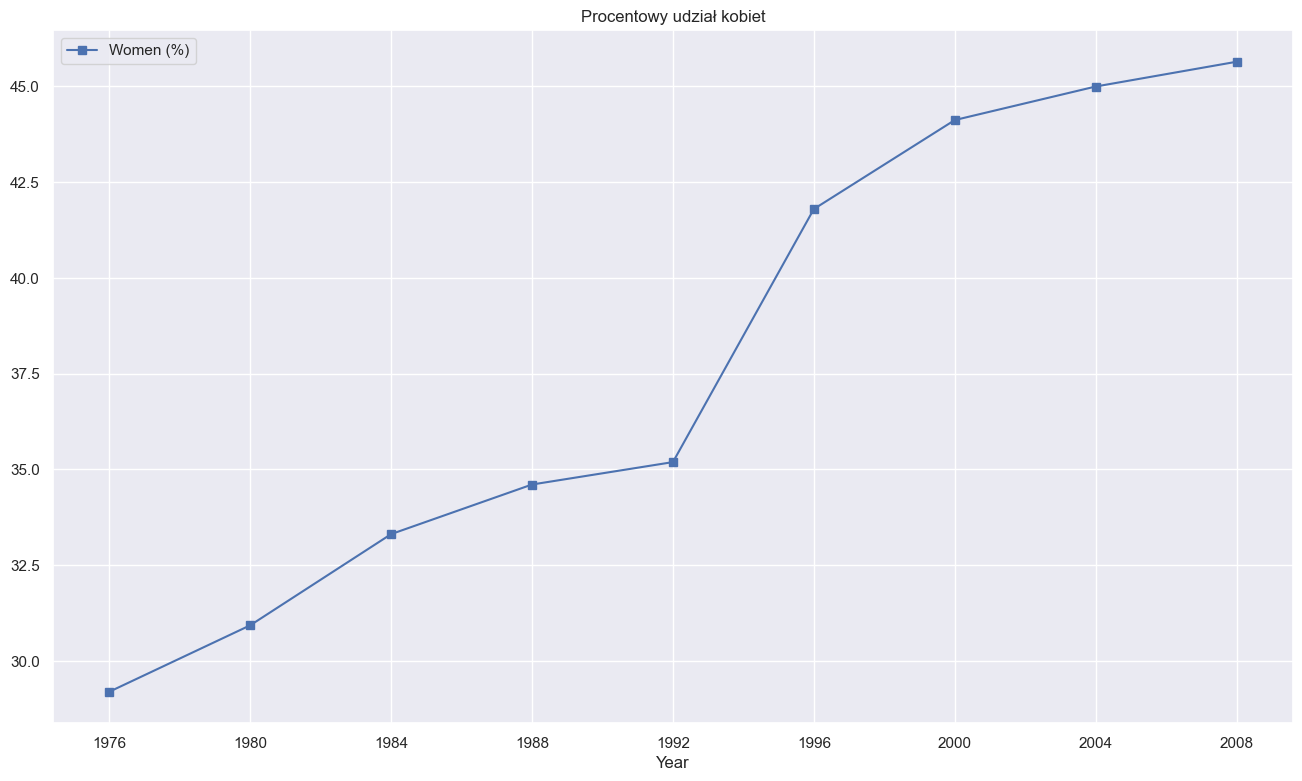

In [18]:
sportowcy.plot(xticks=sportowcy.index,
               y='Women (%)',
               marker='s',
               title='Procentowy udział kobiet',
               figsize=(16, 9));

Nasz wykres zrobił się dwujęzyczny. Nazwę krzywej podmienimy parametrem `label`:

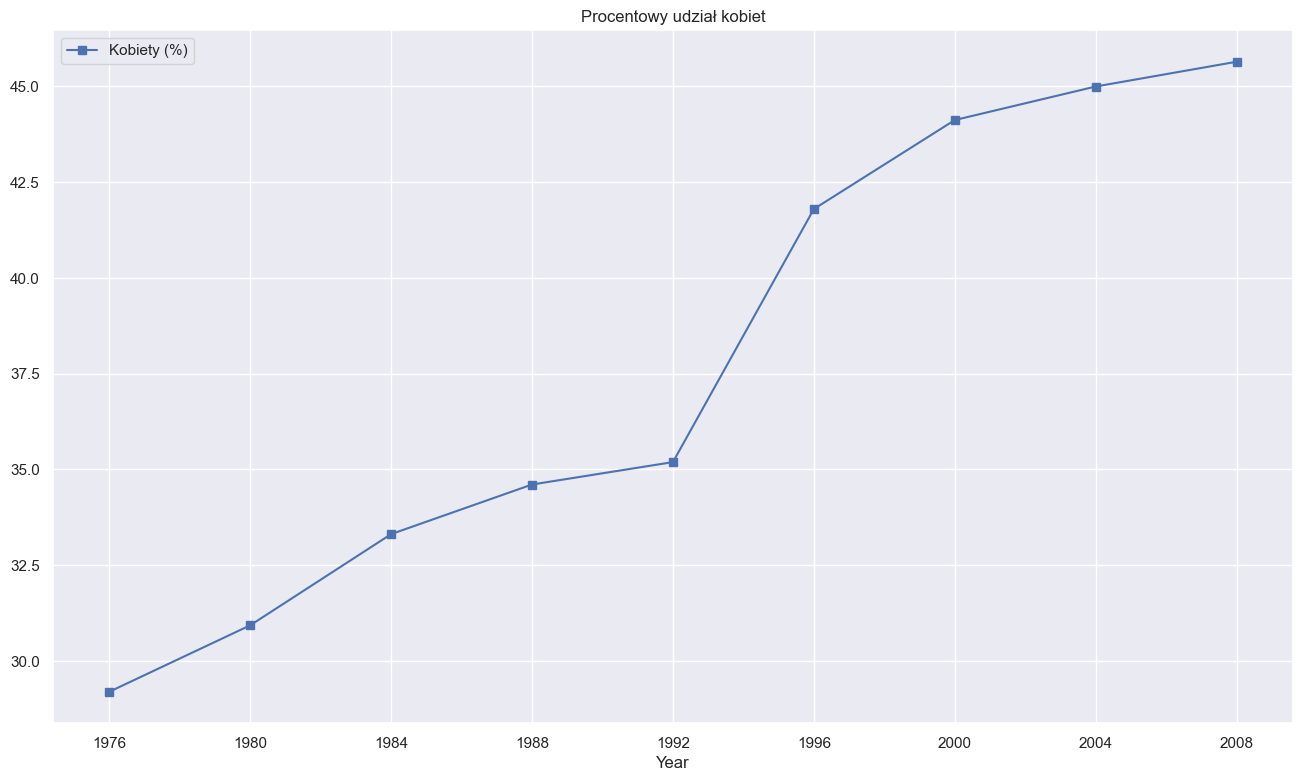

In [19]:
sportowcy.plot(xticks=sportowcy.index,
               y='Women (%)',
               marker='s',
               title='Procentowy udział kobiet',
               label='Kobiety (%)',
               figsize=(16, 9));

Aby podmienić etykietę osi poziomej musimy działać bezpośrednio na obiekcie zwracanym przez metodę `.plot()`. Jest to obiekt modułu `matplotlib.pyplot` odpowiadający obszarowi konkretnego wykresu *ax* w rysunku *figure*:

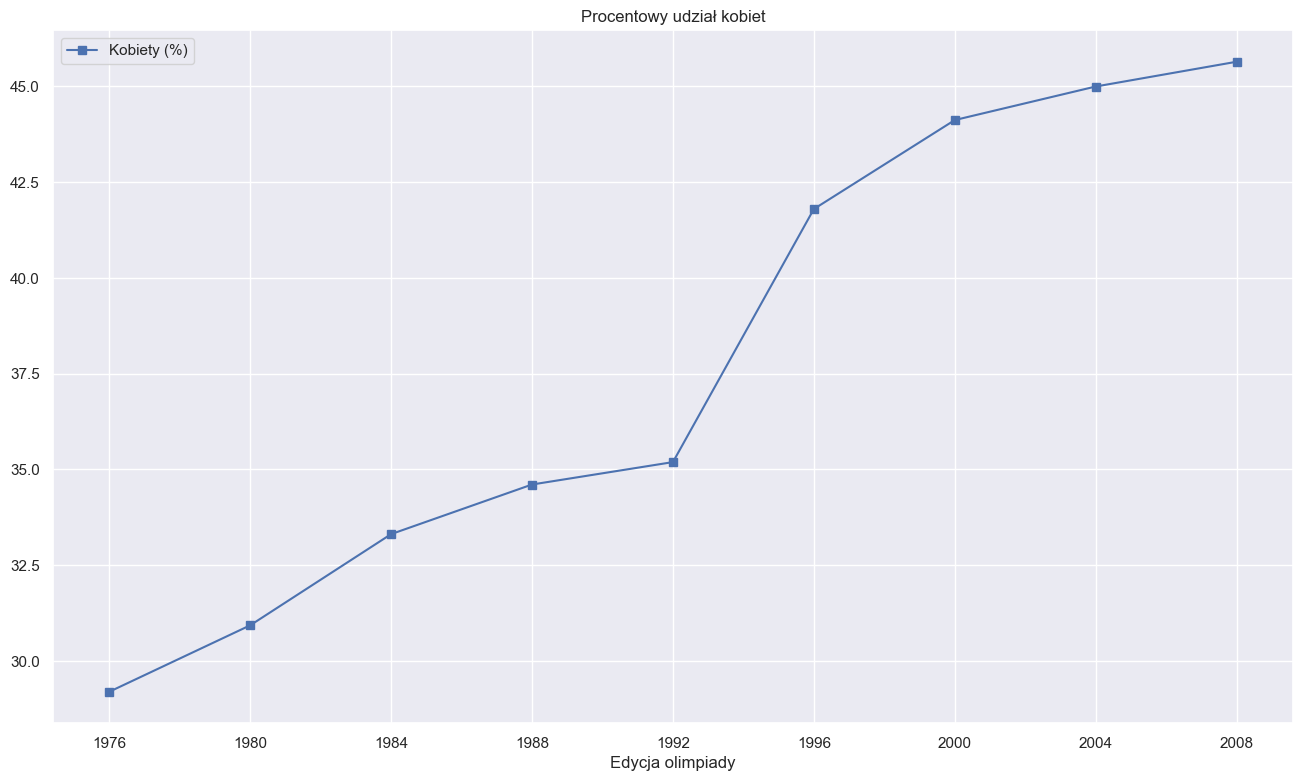

In [20]:
ax = sportowcy.plot(xticks=sportowcy.index,
                    y='Women (%)',
                    marker='s',
                    title='Procentowy udział kobiet',
                    label='Kobiety (%)',
                    figsize=(16, 9));
ax.set(xlabel='Edycja olimpiady');

## Jak zmieniały się kategorie sportowe?

Rodzaje zdarzeń sportowych pogrupowane zostały przez MKOL w następujące trzy kategorie:
* *Sport*,
* *Discipline*,
* *Event*.

Najbardziej ogólna kategoria to *Sport*, która dzieli się na dyscypliny (*Discipline*), które z kolei dzielą się na konkurencje medalowe (*Event*). Konkurencja medalowa jest kategorią mieszaną (`X`) albo dzieli się dalej na dwie podkategorie ze względu na płeć (`W` lub `M`).

Szczegółowe przykłady możemy pobrać wprost z naszej bazy:

In [21]:
olimp['Sport Discipline Event Event_gender'.split()].drop_duplicates()

,Sport,Discipline,Event,Event_gender
0,Aquatics,Diving,3m springboard,W
1,Aquatics,Diving,3m springboard,M
4,Aquatics,Diving,10m platform,W
5,Aquatics,Diving,10m platform,M
12,Aquatics,Swimming,4x100m freestyle relay,W
...,...,...,...,...
15026,Sailing,Sailing,Laser - One Person Dinghy,M
15029,Sailing,Sailing,RS:X - Windsurfer,M
15030,Sailing,Sailing,RS:X - Windsurfer,W
15153,Table Tennis,Table Tennis,team,M


Każda z tych kategorii zmieniała się w czasie, co spróbujemy teraz zaobserwować na wykresach słupkowych. Ramka wyżej zawiera 430 konkurencje medalowe, ale to jest suma po wszystkich latach. Jak wyznaczyć liczność każdej z tych grup z osobna uwzględniając przy tym podział względem lat? 

Wykorzystamy do tego celu metodę `.nunique()` -- *number of unique* w grupie.

Działanie metody zilustrujemy przykładową ramką:

In [22]:
np.random.seed(0)
df = pd.DataFrame(np.random.randint(0, 5, (10, 3)), columns='A B C'.split())
df

,A,B,C
0,4,0,3
1,3,3,1
2,3,2,4
3,0,0,4
4,2,1,0
5,1,1,0
6,1,4,3
7,0,3,0
8,2,3,0
9,1,3,3


Liczba różnych wartości w każdej kolumnie:

In [23]:
df.nunique()

A    5
B    5
C    4
dtype: int64

Liczba różnych wartości w każdym wierszu:

In [24]:
df.nunique(axis=1)

0    3
1    2
2    3
3    2
4    3
5    2
6    3
7    2
8    3
9    2
dtype: int64

Liczba różnych wartości `B` dla każdej ustalonej wartości `A`:

In [25]:
df[['A', 'B']].groupby('A')['B'].nunique()

A
0    2
1    3
2    2
3    2
4    1
Name: B, dtype: int64

In [26]:
df.groupby('A')['B'].nunique()

A
0    2
1    3
2    2
3    2
4    1
Name: B, dtype: int64

Liczba różnych wartości w każdej kolumnie dla ustalonej wartości `A`:

In [27]:
df.groupby('A').nunique()

,B,C
A,,
0,2,2
1,3,2
2,2,1
3,2,2
4,1,1


Wracamy do naszego zadania. Liczba różnych kategorii sportowych w zależności od edycji olimpiady.

In [28]:
kategorie = olimp['Year City Event_gender Sport Discipline Event'.split()]
kategorie = kategorie.groupby('Year City Event_gender'.split())['Sport Discipline Event'.split()].nunique()
kategorie.head(6)

Sport  Discipline  Event
Year City     Event_gender                          
1976 Montreal M                19          23    121
              W                10          11     49
              X                 3           5     13
1980 Moscow   M                19          23    125
              W                11          12     50
              X                 3           5     13

Jak widać podczas igrzysk w Montrealu kobiece konkurencje medalowe grupowały się w 10 kategoriach *Sport*, podczas gdy męskie konkurencje medalowe grupowały się w 19 kategoriach *Sport*. Poszukajmy kategorii *Sport*,  w której nie było żadnej kobiecej konkurencji medalowej:

In [29]:
męskie = set(olimp[(olimp.Year == 1976) & (olimp.Event_gender == 'M')]['Sport'].unique())
kobiece = set(olimp[(olimp.Year == 1976) & (olimp.Event_gender == 'W')]['Sport'].unique())

Zobaczmy, czy kategorie kobiece na pewno stanowią podzbiór męskich:

In [30]:
kobiece.issubset(męskie)

True

Tak wyglądają kategorie wyłącznie męskie dla igrzysk w Montrealu:

In [31]:
męskie - kobiece

{'Boxing',
 'Cycling',
 'Football',
 'Hockey',
 'Judo',
 'Modern Pentathlon',
 'Sailing',
 'Weightlifting',
 'Wrestling'}

Analogiczny test dla igrzysk w roku 2008 (Pekin):

In [32]:
kategorie.loc[2008]

Sport  Discipline  Event
City    Event_gender                          
Beijing M                26          35    154
        W                25          35    121
        X                 3           5      6

In [33]:
męskie = set(olimp[(olimp.Year == 2008) & (olimp.Event_gender == 'M')]['Sport'].unique())
kobiece = set(olimp[(olimp.Year == 2008) & (olimp.Event_gender == 'W')]['Sport'].unique())

In [34]:
kobiece.issubset(męskie)

False

In [35]:
kobiece - męskie

{'Softball'}

In [36]:
męskie - kobiece

{'Baseball', 'Boxing'}

Sumując kategorie kobiece, męskie i mieszane dostaniemy ich całkowitą liczbę w każdym roku. Do wykonania tego zadania przyda się nam metoda `.sum()` z parametrem `level`:

In [40]:
kategorie_total = kategorie.groupby(level=[0, 1]).sum()
kategorie_total

,,Sport,Discipline,Event
Year,City,,,
1976,Montreal,32,39,183
1980,Moscow,33,40,188
1984,Los Angeles,36,45,205
1988,Seoul,41,51,217
1992,Barcelona,45,57,233
1996,Atlanta,47,63,247
2000,Sydney,53,72,279
2004,Athens,54,73,281
2008,Beijing,54,75,281


Przenieśmy indeks `City` do kolumn metodą `.reset_index()`. Od razu powiedzmy, że działanie odwrotne -- przeniesienie kolumny do indeksów -- wykonuje metoda `.set_index()`.

In [41]:
kategorie_total = kategorie_total.reset_index('City')
kategorie_total

,City,Sport,Discipline,Event
Year,,,,
1976,Montreal,32,39,183
1980,Moscow,33,40,188
1984,Los Angeles,36,45,205
1988,Seoul,41,51,217
1992,Barcelona,45,57,233
1996,Atlanta,47,63,247
2000,Sydney,53,72,279
2004,Athens,54,73,281
2008,Beijing,54,75,281


Wykres słupkowy. Parametr `y` wskazuje na kolumny, które mają zostać użyte:

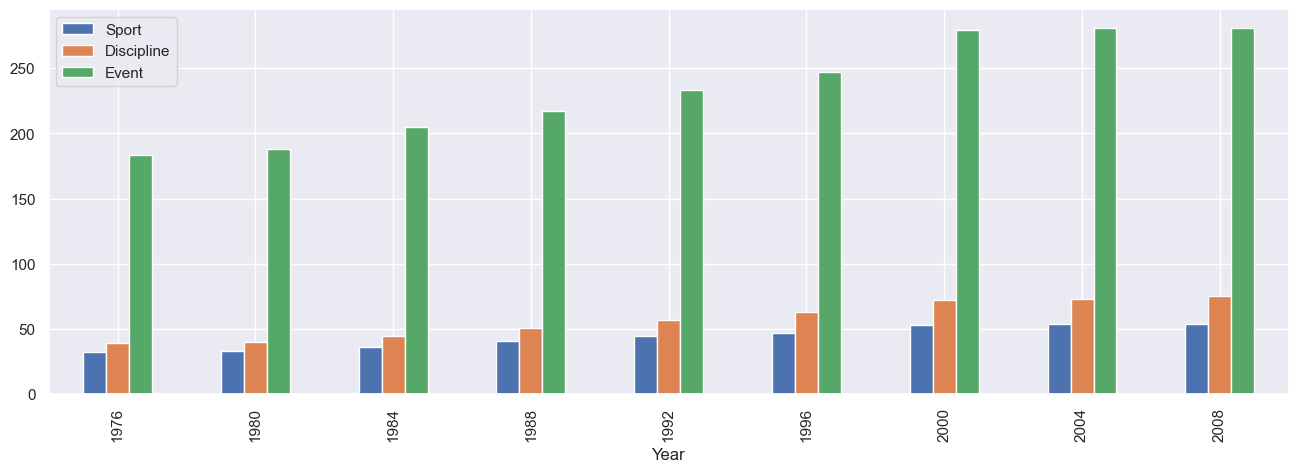

In [42]:
kategorie_total.plot(kind='bar',
                     y='Sport Discipline Event'.split(),
                     figsize=(16, 5));

Wykres słupkowy kolumn względem kolumny zadanej parametrem `x`. Domyślnie wartości dla osi poziomej brane są z indeksów.

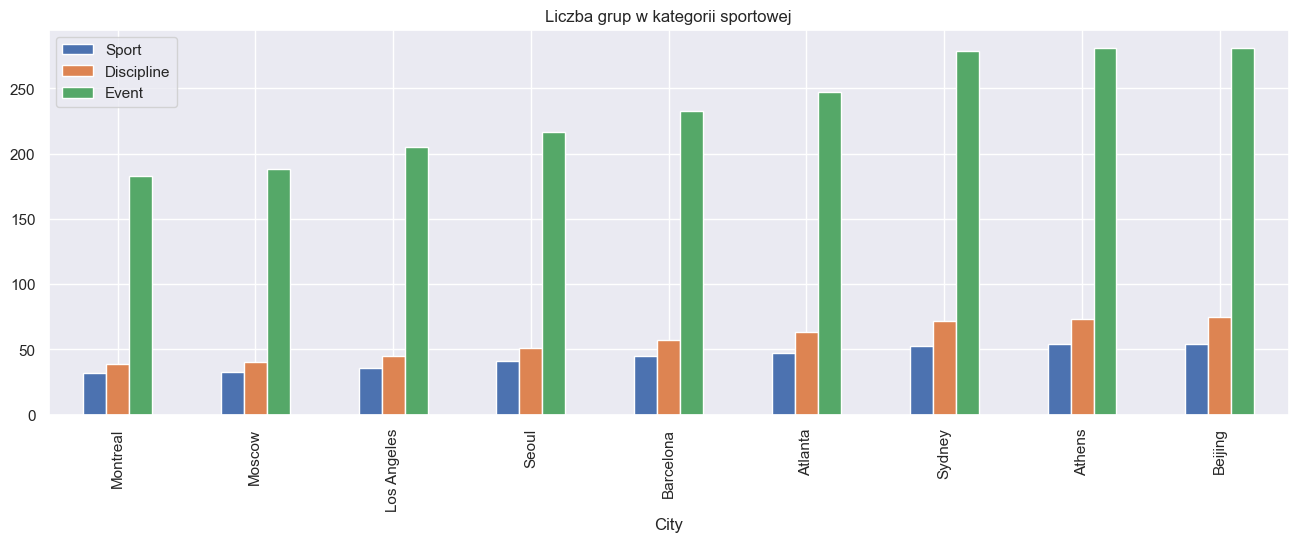

In [43]:
kategorie_total.plot(kind='bar',
                     x='City',
                     y='Sport Discipline Event'.split(),
                     title='Liczba grup w kategorii sportowej',
                     figsize=(16, 5));

Oto wersja pozioma, czyli rodzaj wykresu `'barh'`. Zauważ, że funkcja `plot()` została tu użyta tak, jakby była modułem lub klasą, natomiast rodzaj `barh()` okazał się być funkcją (metodą?). Do wszystkich pozostałych rodzajów ten sposób również może zostać zastosowany.

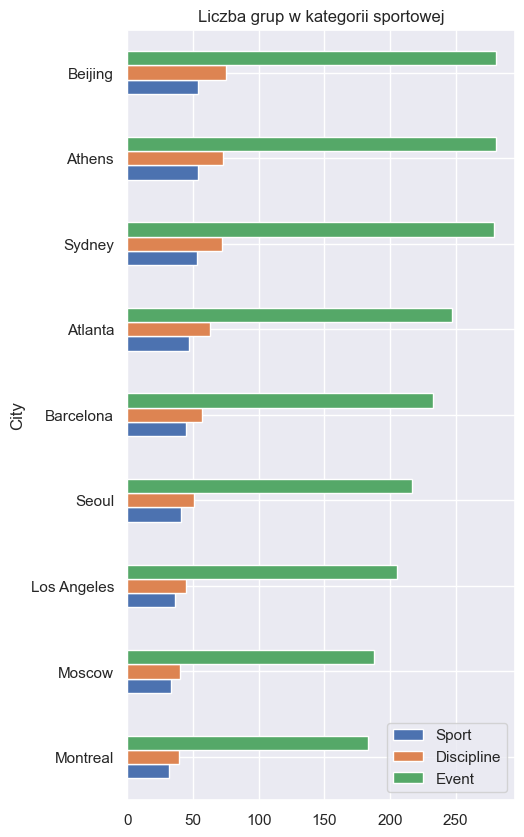

In [44]:
kategorie_total.plot.barh(x='City',
                          y='Sport Discipline Event'.split(),
                          title='Liczba grup w kategorii sportowej',
                          figsize=(5, 10));

Wersja skumulowana:

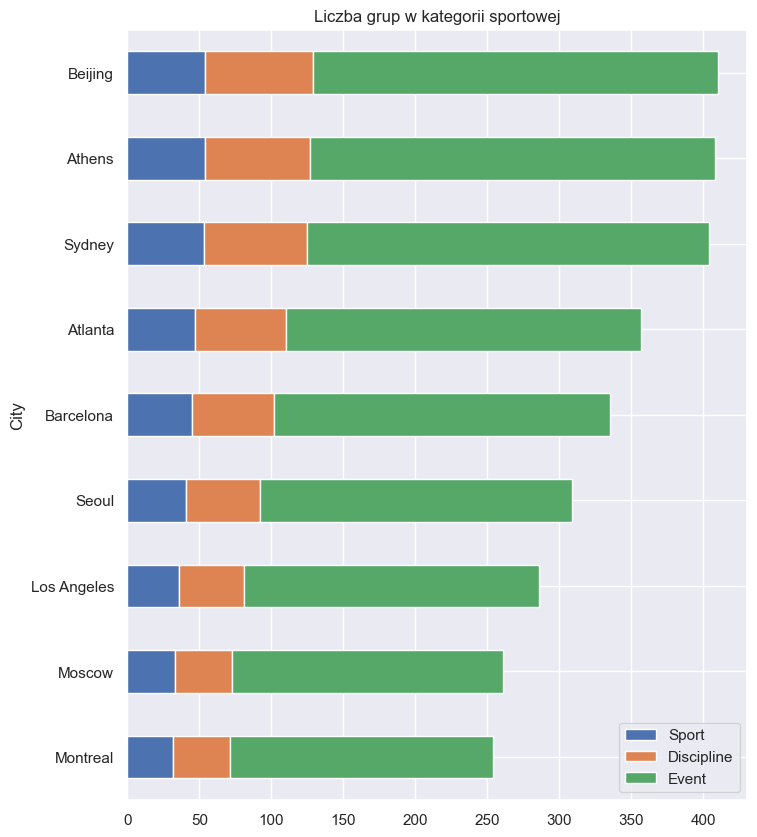

In [45]:
kategorie_total.plot.barh(x='City',
                          y='Sport Discipline Event'.split(),
                          stacked=True,
                          title='Liczba grup w kategorii sportowej',
                          figsize=(8, 10));

## Osiągnięcia medalowe krajów

Utworzymy [wykres pudełkowy](https://pl.wikipedia.org/wiki/Wykres_pude%C5%82kowy) pokazujący statystykę medalową poszczególnych krajów. Ważne pojęcia wiążące się z wykresem pudełkowym to: mediana, kwartyl, kwantyl, rozstęp miedzykwartylowy, wartości odstające.

Baza zawiera dane z dziewięciu edycji, więc dla każdego kraju mamy osiągnięcia medalowe z dziewięciu prób. Próby te na różne sposoby możemy podsumowywać, tutaj proponuję agregację do jednej liczby rankingiem 6 - złoto, 2 - srebro, 1 -brąz. 

Od tego zatem zacznijmy. Tworzymy ramkę `kraje` z rankingiem dla każdego kraju na daną edycję:

In [46]:
kraje = olimp.groupby('Country Year Medal'.split()).size().unstack('Medal').fillna(0).astype('int')
kraje['Ranking'] = 6*kraje.Gold + 2*kraje.Silver + kraje.Bronze
kraje = kraje['Gold Silver Bronze Ranking'.split()]
kraje

Medal             Gold  Silver  Bronze  Ranking
Country     Year                               
Afghanistan 2008     0       0       1        1
Algeria     1984     0       0       2        2
            1992     1       0       1        7
            1996     2       0       1       13
            2000     1       1       3       11
...                ...     ...     ...      ...
Zambia      1984     0       0       1        1
            1996     0       1       0        2
Zimbabwe    1980    16       0       0       96
            2004     1       1       1        9
            2008     1       3       0       12

[559 rows x 4 columns]

Konkretne medale już nas nie interesują:

In [47]:
ranking = kraje[['Ranking']]
ranking

Medal             Ranking
Country     Year         
Afghanistan 2008        1
Algeria     1984        2
            1992        7
            1996       13
            2000       11
...                   ...
Zambia      1984        1
            1996        2
Zimbabwe    1980       96
            2004        9
            2008       12

[559 rows x 1 columns]

Pierwsza próba jest mało udana. Wykres jest, ale zawiera zbyt wiele szczegółów. A jak powstał? Parametr `by` decyduje względem czego należy wykonać dla ramki operację `.groupby()`. Po pogrupowaniu "po krajach" wskazujemy z której kolumny wybrać dla każdego kraju wartości. Do dyspozycji mamy akurat tylko jedną kolumnę -- `Ranking`. 

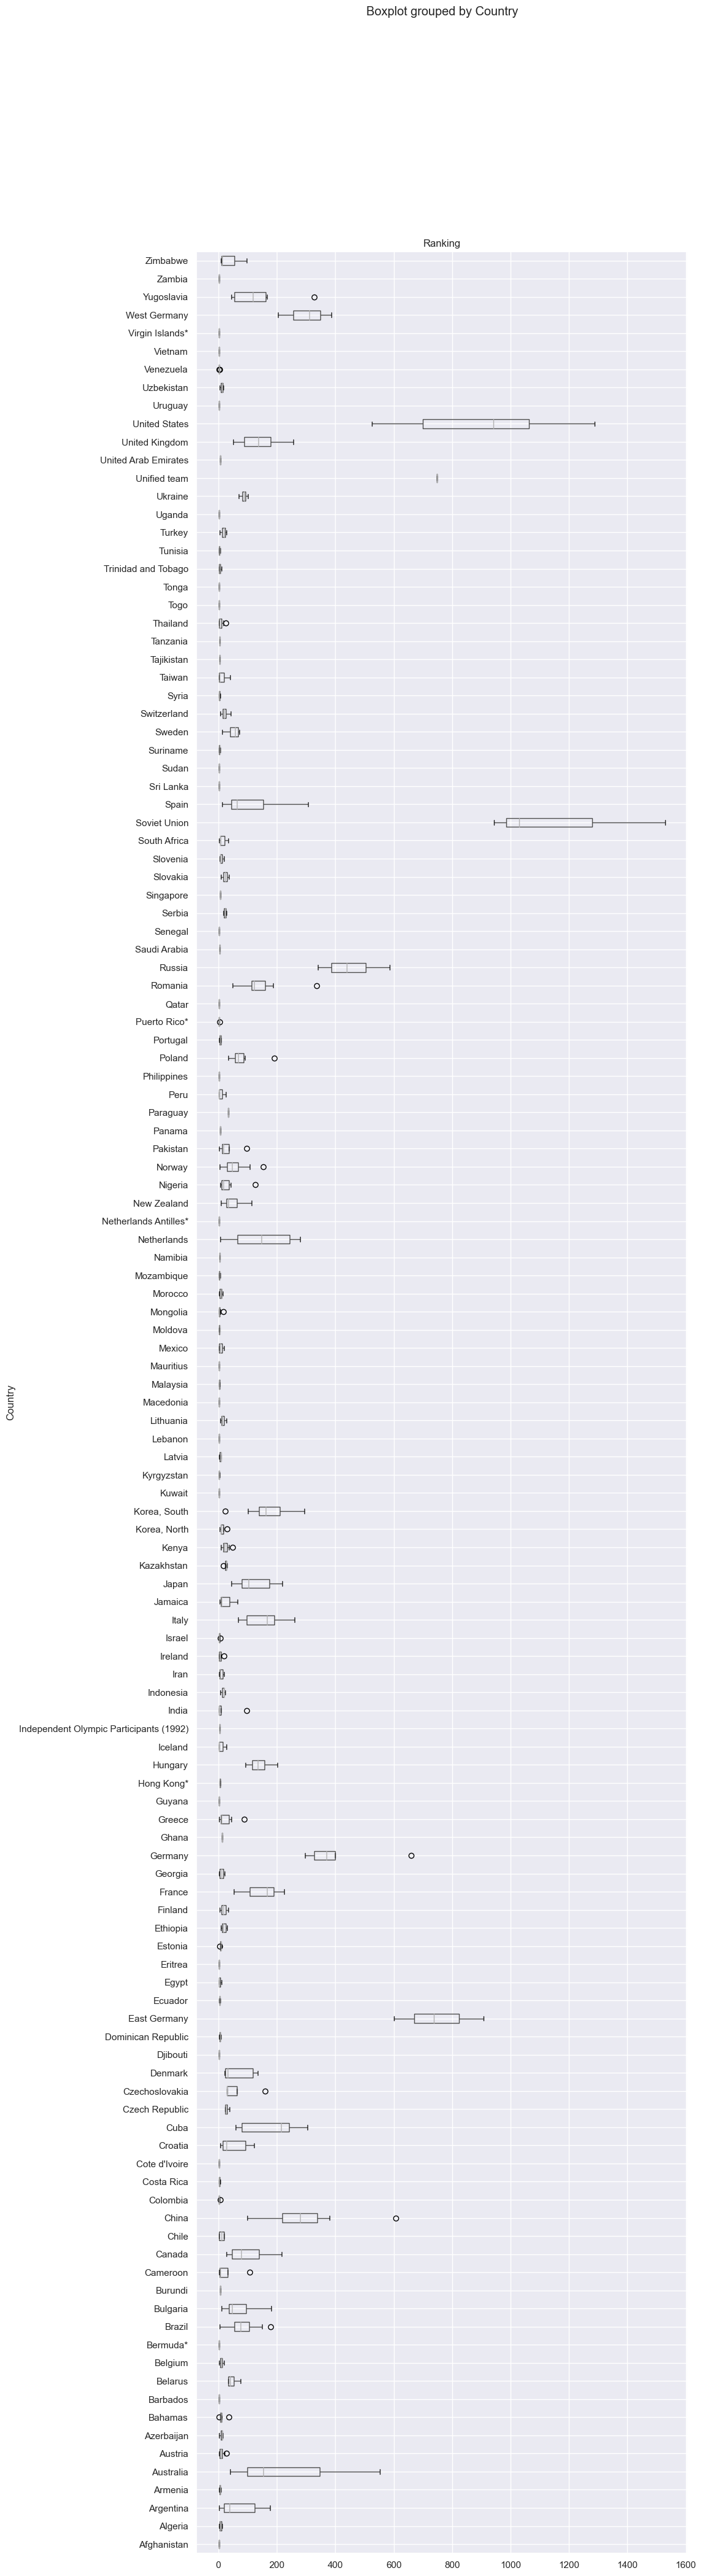

In [48]:
ranking.boxplot(by='Country', 
                column='Ranking',
                vert=False,
                figsize=(10, 50));

Wykres więcej nam powie, jeśli ograniczymy się do oglądania jego fragmentów. Jak taki fragment wybrać? Zauważ, że pudełka są w tej chwili ułożone w kolejności alfabetycznej, czyli z punktu widzenia danych całkowicie przypadkowej. Spróbujmy wprowadzić do tego bałaganu jakiś porządek. Możemy np. wykonać sortowanie ze względu na medianę osiągnięć medalowych. W pudełku mediana znajduje się na poziomie kreski wewnątrz pudełka. 

Ramka `rank_sort` zawiera medianę rankingu dla każdego kraju. Użyjemy jej do sortowania pudełek.

In [49]:
rank_sort = ranking.groupby('Country').median().sort_values(by='Ranking', ascending=False)
rank_sort

Medal,Ranking
Country,
Soviet Union,1029.0
United States,941.5
Unified team,748.0
East Germany,738.0
Russia,439.0
...,...
Eritrea,1.0
Djibouti,1.0
Bermuda*,1.0


W oryginalnym rankingu przenosimy kraje do kolumn. Dzięki temu w każdej kolumnie mamy teraz serię rankingów względem lat edycji:

In [50]:
ranking = ranking.unstack(0)['Ranking']
ranking

Country,Afghanistan,Algeria,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Barbados,Belarus,...,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Virgin Islands*,West Germany,Yugoslavia,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1976,NaN,NaN,NaN,NaN,40.0,1.0,NaN,NaN,NaN,NaN,...,526.0,NaN,NaN,2.0,NaN,NaN,204.0,43.0,NaN,NaN
1980,NaN,NaN,NaN,NaN,39.0,13.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,149.0,NaN,96.0
1984,NaN,2.0,NaN,NaN,99.0,9.0,NaN,NaN,NaN,NaN,...,1288.0,NaN,NaN,3.0,NaN,NaN,386.0,327.0,1.0,NaN
1988,NaN,NaN,14.0,NaN,130.0,6.0,NaN,NaN,NaN,NaN,...,642.0,NaN,NaN,NaN,NaN,2.0,310.0,165.0,NaN,NaN
1992,NaN,7.0,2.0,NaN,154.0,12.0,NaN,1.0,NaN,NaN,...,719.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,13.0,39.0,8.0,308.0,4.0,2.0,10.0,NaN,34.0,...,1108.0,NaN,3.0,NaN,NaN,NaN,NaN,43.0,2.0,NaN
2000,NaN,11.0,37.0,1.0,552.0,20.0,13.0,36.0,1.0,45.0,...,964.0,2.0,10.0,NaN,2.0,NaN,NaN,87.0,NaN,NaN
2004,NaN,NaN,177.0,NaN,480.0,27.0,10.0,7.0,NaN,33.0,...,919.0,NaN,16.0,2.0,NaN,NaN,NaN,NaN,NaN,9.0
2008,1.0,3.0,151.0,6.0,346.0,4.0,14.0,9.0,NaN,75.0,...,1049.0,NaN,13.0,1.0,2.0,NaN,NaN,NaN,NaN,12.0


Teraz robimy użytek z `rank_sort` --  sortujemy kolumny wykorzystując wymyślne indeksowanie (*fancy indexing*). Zwróć uwagę na wartości `NaN`. Stoją za nimi różne przyczyny: brak jakiejkolwiek zdobyczy medalowej w danej edycji; bojkot igrzysk, zobacz [tutaj](https://pl.wikipedia.org/wiki/Letnie_Igrzyska_Olimpijskie_1984#/media/Plik:Olympic_boycotts_1976_1980_1984.PNG); kraje pojawiają się i znikają, np. kraj *Germany* nie istniał przed rokiem 89'.

In [51]:
ranking = ranking[rank_sort.index]
ranking

Country,Soviet Union,United States,Unified team,East Germany,Russia,Germany,West Germany,China,Cuba,France,...,Lebanon,Kuwait,Israel,Iceland,Guyana,Eritrea,Djibouti,Bermuda*,Barbados,Macedonia
Year,,,,,,,,,,,,,,,,,,,,,
1976,943.0,526.0,NaN,738.0,NaN,NaN,204.0,NaN,58.0,52.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1980,1529.0,NaN,NaN,907.0,NaN,NaN,NaN,NaN,67.0,124.0,...,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1984,NaN,1288.0,NaN,NaN,NaN,NaN,386.0,219.0,NaN,189.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1988,1029.0,642.0,NaN,601.0,NaN,NaN,310.0,99.0,NaN,93.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1992,NaN,719.0,748.0,NaN,NaN,660.0,NaN,219.0,304.0,107.0,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,1108.0,NaN,NaN,340.0,369.0,NaN,279.0,260.0,166.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000,NaN,964.0,NaN,NaN,586.0,297.0,NaN,297.0,214.0,206.0,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0
2004,NaN,919.0,NaN,NaN,476.0,399.0,NaN,381.0,224.0,168.0,...,NaN,NaN,7.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2008,NaN,1049.0,NaN,NaN,402.0,327.0,NaN,607.0,91.0,224.0,...,NaN,NaN,1.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN


Domyślne działanie dla `.boxplot()` to utworzyć wykres pudełkowy z serii danych w kolumnach (ewentualnie wskazanych kolumnach):

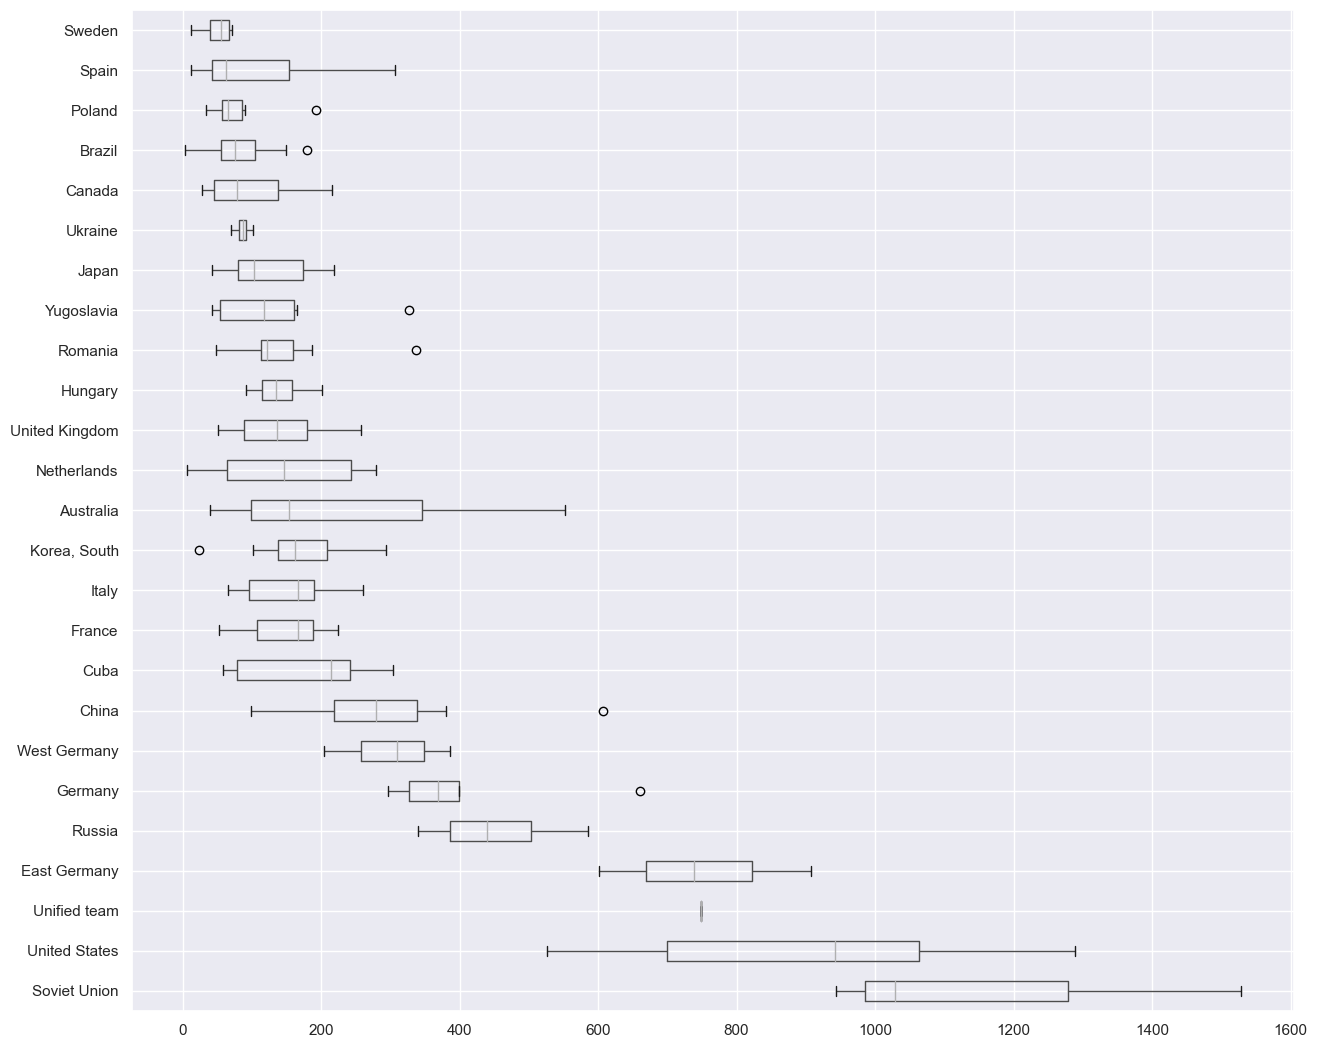

In [52]:
ranking.iloc[:, :25].boxplot(vert=False,
                             figsize=(15, 13));

Co to za kraj *Unified team*?